## Assignment 5.2
## Support vector machines

The goal of this task is to visualize two-dimensional decision boundaries, margins and support vectors for linear and kernel SVMs in case of hard and soft margins.

Generate a dataset (use the functions ```sklearn.datasets.make_blobs``` and ```sklearn.datasets.make_circles``` for the linear and the kernel SVM cases respectively). 

Fit an SVM using ```sklearn.svm.svc```, use ```kernel=linear``` or ```kernel=rbf``` parameter to specify the kernel and the parameter ```C``` to specify whether the margin is soft or hard. Visualize the decision boundary by using the function ```model.decision_function``` and make a scatter plot of the support vectors found in ```model.support_vectors_```. In order to visualize the decision boundary, one option might be to generate a two-dimensional grid using ```np.meshgrid``` and then plot it for selected iso-contours at $f(x)=\{-1,0,1\}$ levels which corresponds to the margin and the decision boundary. A useful function for plotting iso-contours is ```matplotlib.pyplot.contour```.

You are expected to produce 4 plots (hard and soft margin for the linear and RBF cases) similar to the examples below.

In [240]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets.samples_generator import make_circles


In [241]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1)
y[y == 0] = -1

lin = np.linspace(-10, 10, num=400)
grid = np.array(np.meshgrid(lin, lin)).transpose((2, 1, 0))

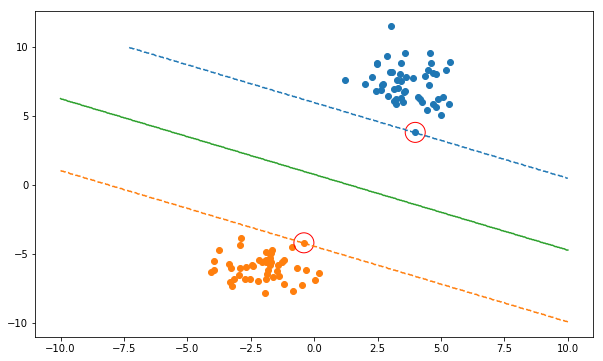

In [242]:
model = SVC(kernel='linear', C=1)
model.fit(X, y)
s_vec = model.support_vectors_

plt.figure(figsize=(10, 6))
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1])
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1])
plt.scatter(s_vec[:, 0], s_vec[:, 1], facecolors='none', edgecolors='r', s=400)

points_neg = []
points_pos = []
points_d_b = []
for gr in grid:
    pred = model.decision_function(gr)
    ind_neg = np.abs(pred - 1) < 1e-2
    ind_pos = np.abs(pred + 1) < 1e-2
    ind_d_b = np.abs(pred) < 1e-2
    
    if len(gr[ind_neg]):
        points_neg.append(gr[ind_neg][0])
    if len(gr[ind_pos]):
        points_pos.append(gr[ind_pos][0])
    if len(gr[ind_d_b]):
        points_d_b.append(gr[ind_d_b][0])
        

points_neg = np.array(points_neg)
points_pos = np.array(points_pos)
points_d_b = np.array(points_d_b)
plt.plot(points_neg[:, 0], points_neg[:, 1], '--')
plt.plot(points_pos[:, 0], points_pos[:, 1], '--')
plt.plot(points_d_b[:, 0], points_d_b[:, 1], '-')

In [243]:
X_c, y_c = make_circles(n_samples=200, noise=0.1, factor=0.3)
y_c[y_c == 0] = -1

lin = np.linspace(-10, 10, num=1000)
grid = np.array(np.meshgrid(lin, lin)).transpose((2, 1, 0))

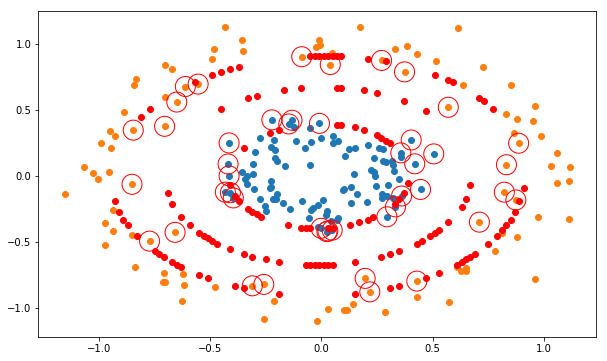

In [244]:
model = SVC(kernel='rbf', C=1)
model.fit(X_c, y_c)

s_vec_c = model.support_vectors_

plt.figure(figsize=(10, 6))
plt.scatter(X_c[y_c == 1][:, 0], X_c[y_c == 1][:, 1])
plt.scatter(X_c[y_c == -1][:, 0], X_c[y_c == -1][:, 1])
plt.scatter(s_vec_c[:, 0], s_vec_c[:, 1], facecolors='none', edgecolors='r', s=400)

points_neg_c = []
points_pos_c = []
points_d_b_c = []
for gr in grid:
    pred = model.decision_function(gr)
    ind_neg = np.abs(pred - 1) < 1e-2
    ind_pos = np.abs(pred + 1) < 1e-2
    ind_d_b = np.abs(pred) < 1e-2
    
    if len(gr[ind_neg]):
        points_neg_c.append(gr[ind_neg][0])
    if len(gr[ind_pos]):
        points_pos_c.append(gr[ind_pos][0])
    if len(gr[ind_d_b]):
        points_d_b_c.append(gr[ind_d_b][0])
        

points_neg_c = np.array(points_neg_c)
points_pos_c = np.array(points_pos_c)
points_d_b_c = np.array(points_d_b_c)

plt.plot(points_neg_c[:, 0], points_neg_c[:, 1], 'or')
plt.plot(points_pos_c[:, 0], points_pos_c[:, 1], 'or')
plt.plot(points_d_b_c[:, 0], points_d_b_c[:, 1], 'or')